# EDA

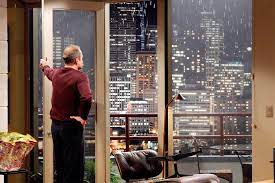

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import pandas as pd
original_dataframe= pd.read_csv("data/King_County_House_prices_dataset.csv")

In [3]:
df=original_dataframe.copy()

Stakeholder: 
>5 kids
- must have at least 5 bedrooms and 2 bathrooms
>no money
- the price must be less than median price 
>wants nice (social) neighborhood
- the home must be close to the homes with price close or greater than the median price. 

- where and when can the stakeholder buy the desired home with reasonable price?  

- Hypothesis A): 
the greater is the difference between the number of bathrooms und bedrooms, the lower the price.

- Hypothesis B): 
the greater is the ratio of footage of the home per bedroom, the higher is the price.


In [4]:
df['date'] = df['date'].astype('datetime64[ns]')
df["month_sold"]=df.date.dt.month
df["year_sold"]=df.date.dt.year

In [5]:
df_2014=df[df['year_sold']==2014]
df_2015=df[df['year_sold']==2015]

from wiki:

In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower [2] and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath". This lack of a single, universal definition commonly results in discrepancies between advertised and actual number of baths in real estate listings. An additional complication is that there are currently two ways of notating the number of bathrooms in a dwelling. One method is to count a half bathroom as ".5" and then add this to the number of full bathrooms (e.g., "2.5" baths would mean 2 full baths and 1 half bath). The other, newer method is to put the number of full bathrooms to the left side of the decimal point and to put the number of half bathrooms to the right of the decimal point (e.g., "2.1" would mean 2 full baths and 1 half bath; "3.2" would mean 3 full baths and 2 half baths).

In summary, just a big mess :)

In [7]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month_sold          0
year_sold           0
dtype: int64

> The hypothese A is not valid. 
- In the following graph we can see that the price doesn't depend on the difference of the number bedrooms and bathrooms.

>Hypothesis B is valid. 
- In the following graph we see thet the price is positively depend on the rooms-bath ratio.

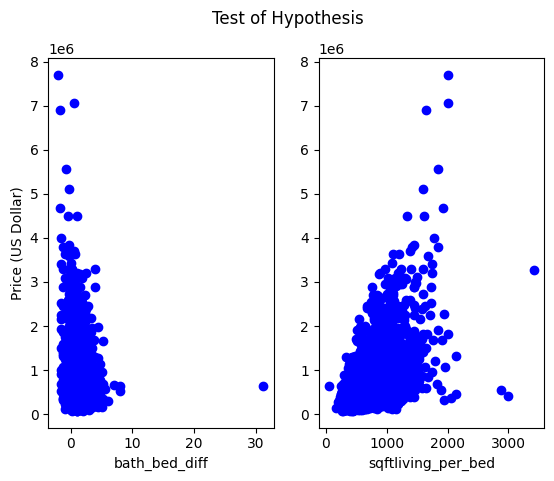

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Test of Hypothesis')

ax1.plot(df_2014["bedrooms"]-df_2014["bathrooms"],df_2014["price"],"bo")
ax1.set_ylabel('Price (US Dollar)')
ax1.set_xlabel("bath_bed_diff")


ax2.plot(df_2014["sqft_living"]/df_2014["bedrooms"],df_2014["price"],"bo")
ax2.set_xlabel("sqftliving_per_bed")

plt.show()

Dataframe with column of interest

In [13]:
# choosing and adding certain column of our interest into a new data frame df_1.
# This datafrane includes price, number of bathrooms, nimber of bedrooms, difference of them, area of livingroom 
# and the area of livingroom per bedroom  
df_2014_1=df_2014[["price","bathrooms","bedrooms","sqft_living","sqft_living15"]];
df_2014_1["bath_bed_diff"]=df_2014["bathrooms"]-df_2014["bedrooms"]
df_2014_1["sqftliving_per_bed"]=df_2014["sqft_living"]/df_2014["bedrooms"]
df_2014_1["bed_bath_ratio"]=df_2014["bedrooms"]/df_2014["bathrooms"]


> Correlation table of df_1

In [14]:
#corrolation table of the variables in df_1.
df_2014_1.corr(method='pearson')

,price,bathrooms,bedrooms,sqft_living,sqft_living15,bath_bed_diff,sqftliving_per_bed,bed_bath_ratio
price,1.000000,0.532741,0.308776,0.712322,0.583350,0.140466,0.587479,-0.248974
bathrooms,0.532741,1.000000,0.510047,0.753964,0.570586,0.339719,0.512801,-0.643430
bedrooms,0.308776,0.510047,1.000000,0.570689,0.390023,-0.635718,-0.025954,0.226592
sqft_living,0.712322,0.753964,0.570689,1.000000,0.757384,0.052611,0.754367,-0.315999
sqft_living15,0.583350,0.570586,0.390023,0.757384,1.000000,0.085591,0.603553,-0.296502
bath_bed_diff,0.140466,0.339719,-0.635718,0.052611,0.085591,1.000000,0.488582,-0.825200
sqftliving_per_bed,0.587479,0.512801,-0.025954,0.754367,0.603553,0.488582,1.000000,-0.531107
bed_bath_ratio,-0.248974,-0.643430,0.226592,-0.315999,-0.296502,-0.825200,-0.531107,1.000000


>The location of the houses

In [15]:
# in this figure we present the location of objects in the map. 
fig = px.scatter_mapbox(df_2014,
                        lat="lat",
                        lon="long",
                        zoom=7,
                        height=700)
fig.update_layout(mapbox_style="open-street-map")

Probabilty distribution function 

<AxesSubplot: xlabel='price', ylabel='Density'>

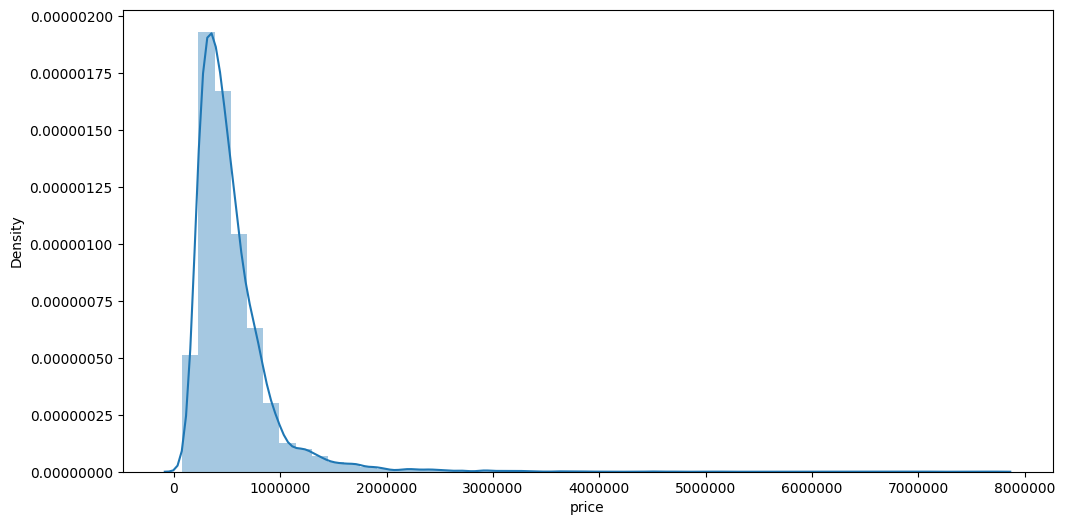

In [16]:
#visualisation of the probability distribution function of the price as a randim variable
plt.figure(figsize=(12,6))
plt.subplot().ticklabel_format(useOffset=False,style='plain')
sns.distplot(df_2014['price'])

In [17]:
# Median of the price. It is more representetive for this kind of skewed distribution.
df_2014["price"].median()

450000.0

In [18]:
df_2014["sqft_living15"].quantile(q=0.75)

2380.0

<AxesSubplot: xlabel='sqft_living15', ylabel='Density'>

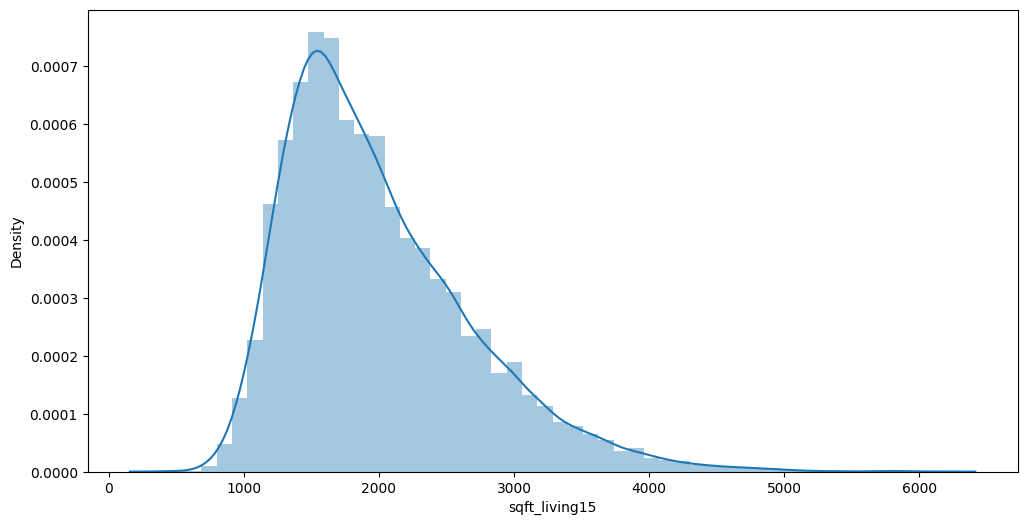

In [19]:
#visualisation of the probability distribution function of the price as a randim variable
plt.figure(figsize=(12,6))
plt.subplot().ticklabel_format(useOffset=False,style='plain')
sns.distplot(df_2014['sqft_living15'])

Filtered data based on needs of stakeholder

In [20]:
df_2014_filter=df_2014[(df_2014.price< 500000) & (df_2014.sqft_living15 >=2360) & (df_2014.bedrooms>4)]

In [21]:
df_2014_filter.zipcode.unique()

array([98052, 98003, 98059, 98023, 98092, 98027, 98077, 98042, 98019,
       98055, 98198, 98166, 98038, 98058, 98168, 98001, 98188, 98056,
       98031, 98074, 98011, 98030, 98065, 98155, 98125, 98177, 98178,
       98002, 98032, 98119])

In [22]:
fig = px.scatter_mapbox(df_2014_filter,
                        lat="lat",
                        lon="long",
                        zoom=7,
                        height=700)
fig.update_layout(mapbox_style="open-street-map")

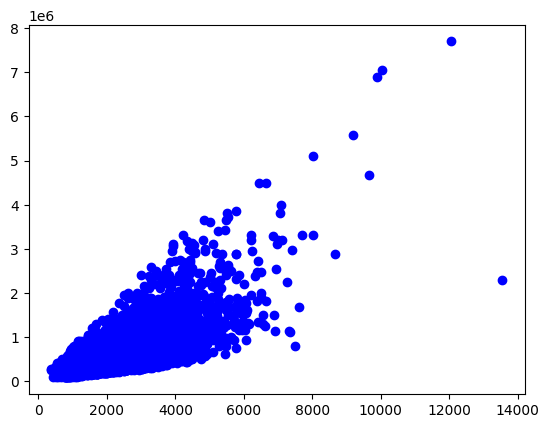

In [23]:
plt.plot(df_2014["sqft_living"],df_2014["price"],"bo")

In [26]:
df_2014_timing=df_2014[["month_sold","price"]].groupby("month_sold").median()

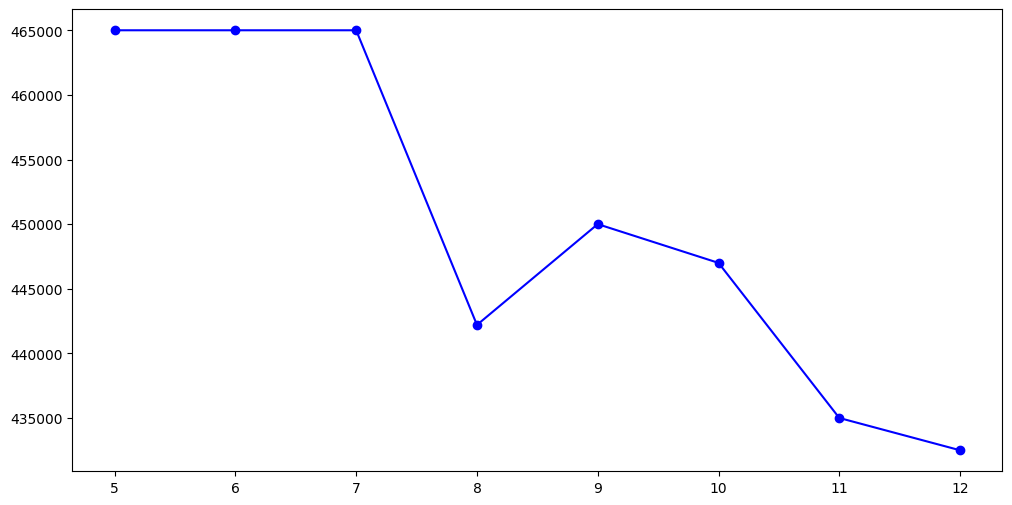

In [27]:
plt.figure(figsize=(12,6))
plt.subplot().ticklabel_format(useOffset=False,style='plain')
plt.plot(df_2014_timing,"bo-")